<a href="https://colab.research.google.com/github/JavierPachas/ml_zoomcamp/blob/main/04_evaluation_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [24]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [88]:
df = data[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']]

In [89]:
df.columns = [item.lower().replace(' ','_') for item in df.columns]

In [90]:
df.fillna(0, inplace = True)

<ipython-input-90-cb683e894f80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace = True)


In [91]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [92]:
price_mean = df.msrp.mean()
price_mean

40594.737032063116

In [93]:
df['above_average'] = (df.msrp > price_mean).astype(int)
df.drop('msrp',axis = 1, inplace = True)
df.head()

<ipython-input-93-c17d6fa69774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average'] = (df.msrp > price_mean).astype(int)
<ipython-input-93-c17d6fa69774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('msrp',axis = 1, inplace = True)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [94]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns


['make', 'model', 'transmission_type', 'vehicle_style']

In [95]:
for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ','_')


df.head()

<ipython-input-95-44f4c3066da3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].str.lower().str.replace(' ','_')


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [96]:
import sklearn
from sklearn.model_selection import train_test_split

In [97]:
#train/validation/test (60%, 20%, 20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

**Question 1**

In [98]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.metrics import roc_auc_score

In [100]:
print(f"AUC for year: {roc_auc_score(y_train, df_train['year'])}")
print(f"AUC for engine_hp: {roc_auc_score(y_train, df_train['engine_hp'])}")
print(f"AUC for engine_cylinders: {roc_auc_score(y_train, df_train['engine_cylinders'])}")
print(f"AUC for highway_mpg: {roc_auc_score(y_train, -df_train['highway_mpg'])}")
print(f"AUC for city_mpg: {roc_auc_score(y_train, -df_train['city_mpg'])}")

AUC for year: 0.687551492804683
AUC for engine_hp: 0.9171031265539011
AUC for engine_cylinders: 0.766116490165669
AUC for highway_mpg: 0.6330587871772013
AUC for city_mpg: 0.6734244643245233


**Question 2**

In [101]:
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']
categorical = ['make','model','transmission_type','vehicle_style']

In [102]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [103]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

#threshold (t)
t = 0.5
y_pred = model.predict_proba(X_val)[:, 1]
price_decision = (y_pred >= t)
(y_val == price_decision).mean()

0.931598825010491

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(y_val, y_pred >= t)

0.931598825010491

In [106]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.796
0.10 0.851
0.15 0.881
0.20 0.895
0.25 0.903
0.30 0.913
0.35 0.919
0.40 0.927
0.45 0.928
0.50 0.932
0.55 0.932
0.60 0.924
0.65 0.919
0.70 0.916
0.75 0.912
0.80 0.903
0.85 0.889
0.90 0.869
0.95 0.842
1.00 0.726


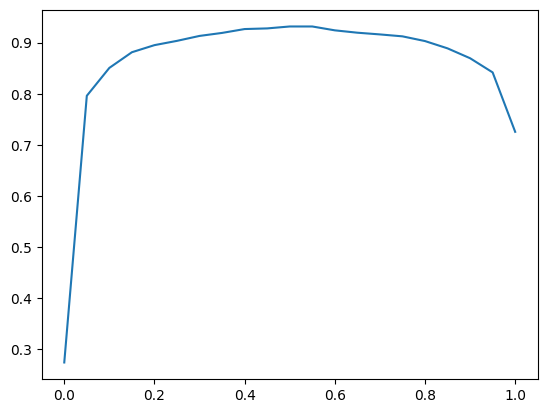

In [107]:
plt.plot(thresholds, scores)
#at t=0.5, score = 0.932 is the higher

In [108]:
roc_auc_score(y_val, y_pred)

0.976576055523424

**Question 3**

precision = TP/TP+FP

recall = TP/TP+FN

In [115]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))


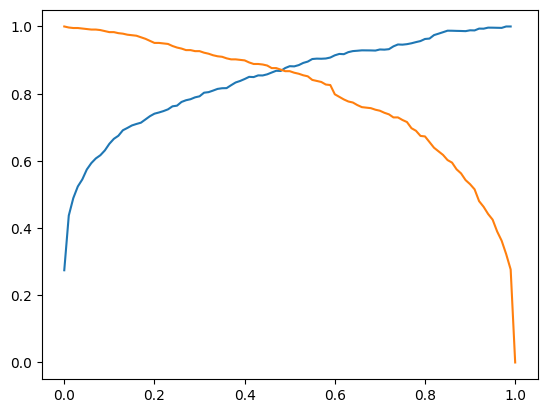

In [117]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['precisions'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recalls'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores['threshold'], df_scores['precisions'], label = 'precision')
plt.plot(df_scores['threshold'], df_scores['recalls'], label = 'recall')
plt.show()

In [132]:
print(df_scores[['threshold','precisions','recalls']][40:60])

    threshold  precisions   recalls
40       0.40    0.843615  0.899083
41       0.41    0.850073  0.892966
42       0.42    0.849415  0.888379
43       0.43    0.854412  0.888379
44       0.44    0.854197  0.886850
45       0.45    0.857567  0.883792
46       0.46    0.862952  0.876147
47       0.47    0.868182  0.876147
48       0.48    0.867580  0.871560
49       0.49    0.876352  0.866972
50       0.50    0.881804  0.866972
51       0.51    0.881250  0.862385
52       0.52    0.885039  0.859327
53       0.53    0.891547  0.854740
54       0.54    0.895498  0.851682
55       0.55    0.903120  0.840979
56       0.56    0.904290  0.837920
57       0.57    0.903974  0.834862
58       0.58    0.904682  0.827217
59       0.59    0.907563  0.825688


**Question 4**

In [125]:
df_scores.fillna(1, inplace = True)

In [128]:
df_scores['F'] = 2*df_scores['precisions']*df_scores['recalls'] / (df_scores['precisions']+df_scores['recalls'])

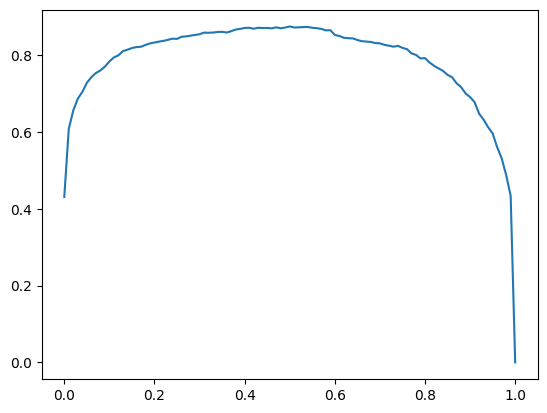

In [129]:
plt.plot(df_scores['threshold'], df_scores['F'] )

In [133]:
print(df_scores[['threshold','F']][40:60])

    threshold         F
40       0.40  0.870466
41       0.41  0.870992
42       0.42  0.868460
43       0.43  0.871064
44       0.44  0.870218
45       0.45  0.870482
46       0.46  0.869499
47       0.47  0.872146
48       0.48  0.869565
49       0.49  0.871637
50       0.50  0.874325
51       0.51  0.871716
52       0.52  0.871994
53       0.53  0.872756
54       0.54  0.873041
55       0.55  0.870942
56       0.56  0.869841
57       0.57  0.868045
58       0.58  0.864217
59       0.59  0.864692


**Question 5**

In [143]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000, solver = 'liblinear')
    model.fit(X_train, y_train)

    return dv, model

In [144]:
dv, model = train(df_train, y_train, C=1)

In [145]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [146]:
y_pred = predict(df_val, dv, model)

In [147]:
from sklearn.model_selection import KFold

In [148]:
from tqdm.auto import tqdm

In [152]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [153]:
np.std(scores)

0.002085065346443152

In [154]:
for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

  0%|          | 0/4 [00:00<?, ?it/s]

In [155]:
scores

[0.9832350191128344,
 0.9808489466508334,
 0.984804249623557,
 0.979890970944175,
 0.977485014985015]